In [1]:
!pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/294.9 kB ? eta -:--:--
   ----- --------------------------------- 41.0/294.9 kB 653.6 kB/s eta 0:00:01
   -------- ------------------------------ 61.4/294.9 kB 544.7 kB/s eta 0:00:01
   ---------- ---------------------------- 81.9/294.9 kB 508.4 kB/s eta 0:00:01
   ---------- ---------------------------- 81.9/294.9 kB 508.4 kB/s eta 0:00:01
   -------------- ----------------------- 112.6/294.9 kB 435.7 kB/s eta 0:00:01
   -------------- ----------------------- 112.6/294.9 kB 435.7 kB/s eta 0:00:01
   --------------- ---------------------- 122.9/294.9 kB 379.3 kB/s eta 0:00:01
   ------------------ ------------------- 143.4/294.9 kB 369.8 kB/s eta 0:00:01
   ------------------ ------------------- 143.4/294.9 kB 369.8 kB/s eta 0:00:01
   --------------------- ---------------- 163.8/294.9 kB 350.7 kB/

In [2]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

C:\Users\Salah_Radwan\AppData\Local\Temp\ipykernel_25060\3878760062.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df = pd.read_csv("churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [6]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Churn'>

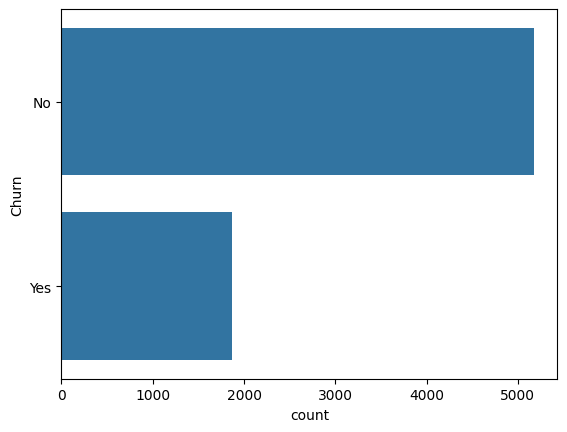

In [9]:
sns.countplot(df['Churn'])

In [10]:
numRetained = df[df.Churn == 'No'].shape[0]
numChurned = df[df.Churn == 'Yes'].shape[0]

# print the percentage of customers that stayed
print(numRetained/(numRetained + numChurned) * 100,'% of customers stayed in the company')
# peint the percentage of customers that left
print(numChurned/(numRetained + numChurned) * 100, '% of customers left with the company')

73.4630129206304 % of customers stayed in the company
26.536987079369588 % of customers left with the company


<Axes: xlabel='gender', ylabel='count'>

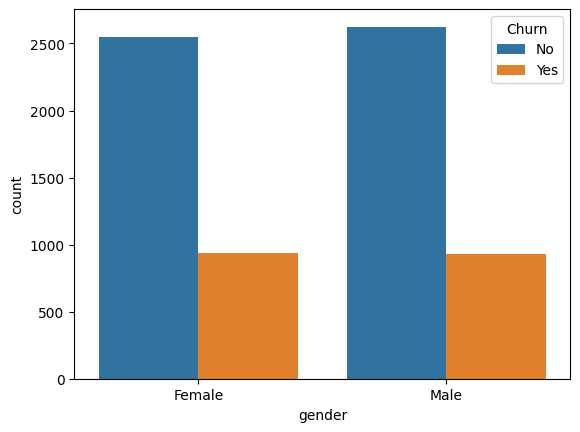

In [11]:
sns.countplot(x ='gender', hue='Churn', data=df)

<Axes: xlabel='InternetService', ylabel='count'>

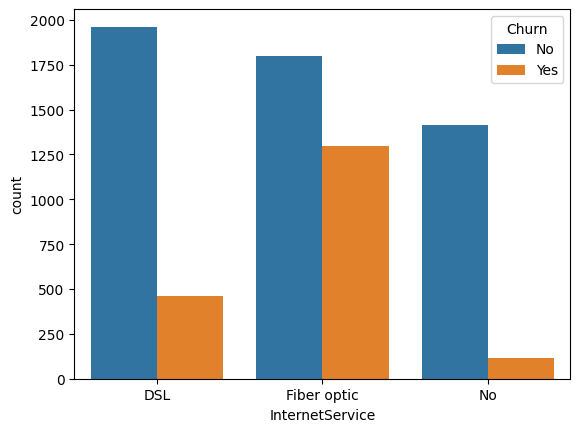

In [12]:
sns.countplot(x='InternetService', hue='Churn', data=df)

array([<Axes: title={'center': 'tenure'}>,
       <Axes: title={'center': 'MonthlyCharges'}>], dtype=object)

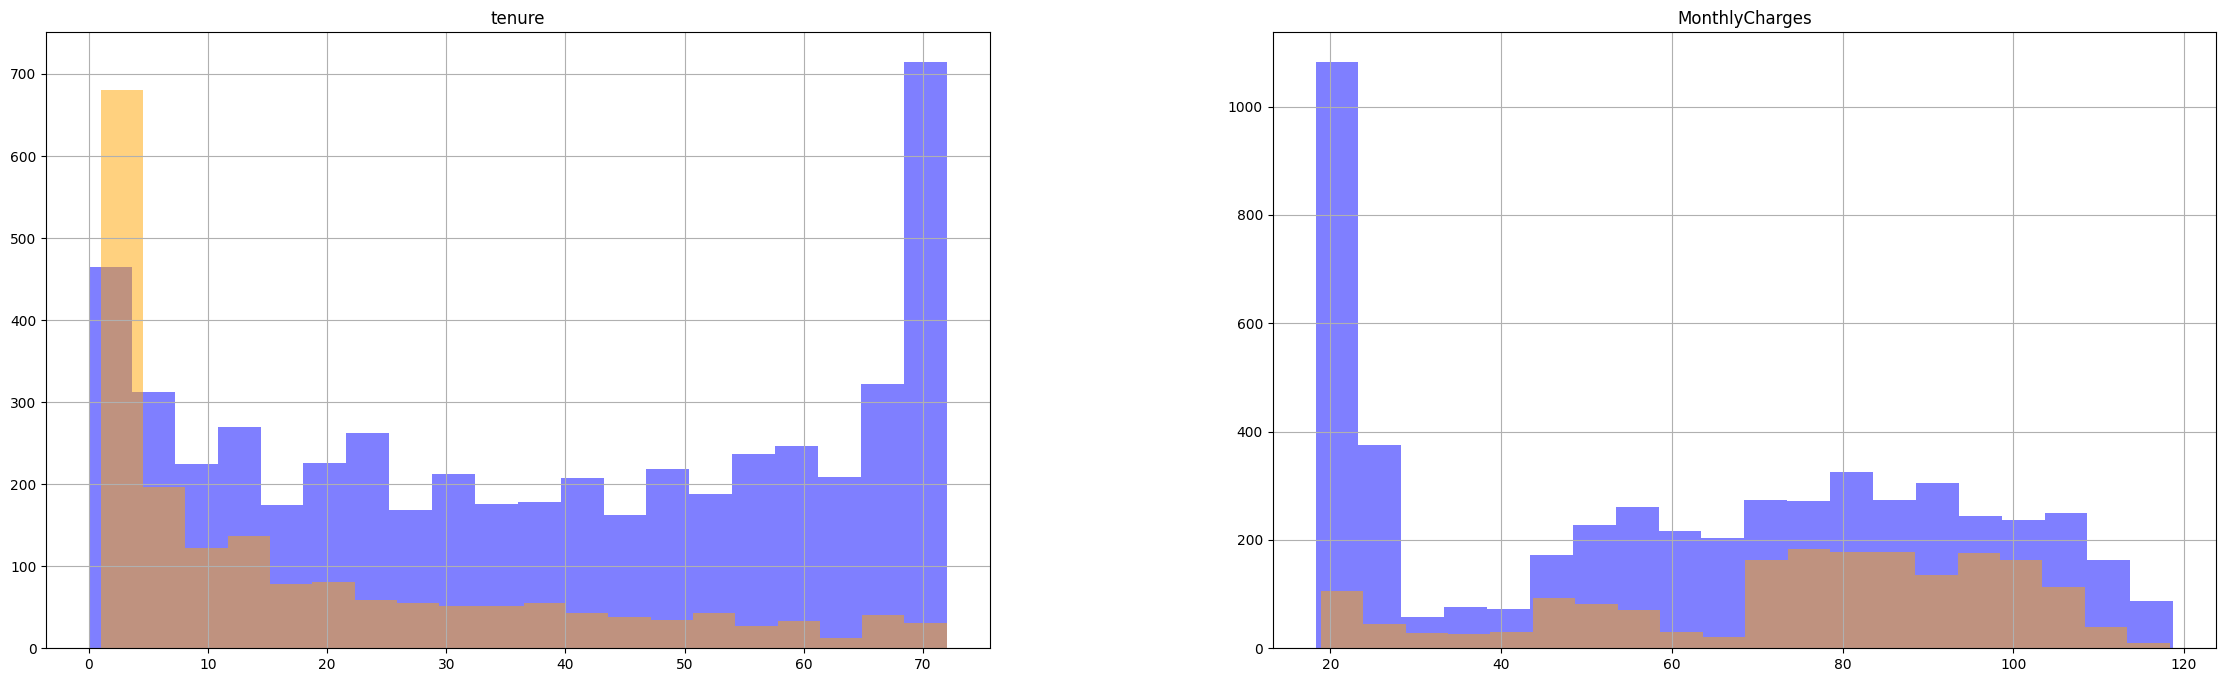

In [13]:
numericFeatures = ['tenure', 'MonthlyCharges']
fig, ax = plt.subplots(1,2, figsize=(28, 8))
df[df.Churn == "No"][numericFeatures].hist(bins=20, color='blue', alpha=0.5, ax=ax)
df[df.Churn == "Yes"][numericFeatures].hist(bins=20, color='orange', alpha=0.5, ax=ax)

In [14]:
cleanDF = df.drop('customerID', axis=1)

In [15]:
# Convert all the non-numeric columns to numeric
for column in cleanDF.columns:
  if cleanDF[column].dtype == np.number:
    continue
  cleanDF[column] = LabelEncoder().fit_transform(cleanDF[column])

SyntaxError: invalid syntax (2902035140.py, line 1)

In [1]:
class person:
    # name variable is present
    name = "lord"

# lord object is present
lord = person()
print(lord.name)

lord


In [2]:
from flask import Flask, render_template, request
import numpy as np
import matplotlib.pyplot as plt
import cv2
from io import BytesIO
import base64

app = Flask(__name__)

# Dummy data loading function
def load_data():
    # Replace these with actual loading code
    x_valid = np.random.rand(10, 256, 256, 3)  # Example shape
    y_valid = np.random.rand(10, 256, 256, 1)  # Example shape
    return x_valid, y_valid

x_valid, y_valid = load_data()

@app.route('/visualize/<int:image_index>')
def visualize(image_index):
    input_image = x_valid[image_index]
    true_mask = y_valid[image_index]

    # Load your model
    model2 = keras.models.load_model('modified_unet_model (2).h5')
    predicted_mask = model2.predict(np.expand_dims(input_image, axis=0))[0]
    threshold = 0.5
    predicted_mask_binary = (predicted_mask > threshold).astype(np.uint8)

    # Create plots
    fig, axs = plt.subplots(1, 4, figsize=(20, 5))
    axs[0].imshow(input_image)
    axs[0].set_title('Original Image')
    axs[1].imshow(true_mask[:, :, 0], cmap='gray')
    axs[1].set_title('True Mask')
    axs[2].imshow(predicted_mask_binary[:, :, 0], cmap='gray')
    axs[2].set_title('Predicted Mask')
    axs[3].imshow(input_image, cmap='bone')
    axs[3].imshow(predicted_mask_binary[:, :, 0], alpha=0.5, cmap='nipy_spectral')
    axs[3].set_title('Overlay')

    # Convert plot to PNG image
    buf = BytesIO()
    plt.savefig(buf, format='png')
    buf.seek(0)
    image_base64 = base64.b64encode(buf.getvalue()).decode('utf-8')
    plt.close()

    return f'<img src="data:image/png;base64,{image_base64}" />'

if __name__ == '__main__':
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with stat


SystemExit: 1

C:\Users\Salah_Radwan\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


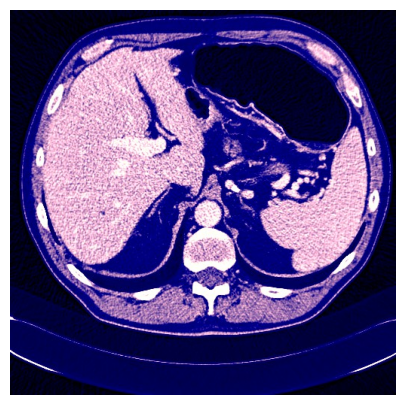

: 

In [1]:
from PIL import Image
import matplotlib.pyplot as plt

# Load the uploaded image
image_path = "../volume-3_slice_418.jpg"
image = Image.open(image_path)

# Display the image
plt.figure(figsize=(10, 5))
plt.imshow(image)
plt.axis('off')
plt.show()